# シェルソート

- 基本挿入法
- シェルソート

In [1]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import random

In [2]:
# 基本挿入法
def insert_sort(array):
    N = len(array)
    for i in range(N):
        for j in reversed(range(1, i+1)):
            if array[j-1] > array[j]:
                buff = array[j]
                array[j] = array[j-1]
                array[j-1] = buff
            else:
                break

In [3]:
arr = np.array([random.randint(0, 100) for i in range(30)])
insert_sort(arr)
arr

array([ 0,  1,  5,  9, 24, 31, 33, 33, 34, 35, 46, 46, 54, 58, 61, 61, 61,
       79, 80, 82, 85, 86, 86, 87, 89, 89, 90, 91, 93, 99])

In [4]:
n_list = []
t_list = []
for n in [1000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    start = time.time()
    insert_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))

pd.DataFrame(data=np.array([n_list, t_list]).T, columns=['array length', 'sort time [s]'])

,array length,sort time [s]
0,1000.0,0.379249
1,2000.0,1.598658
2,3000.0,3.621170
3,4000.0,6.386534
4,5000.0,10.204445
5,6000.0,14.168217
6,7000.0,19.645965
7,8000.0,26.310077
8,9000.0,32.299246
9,10000.0,41.269744


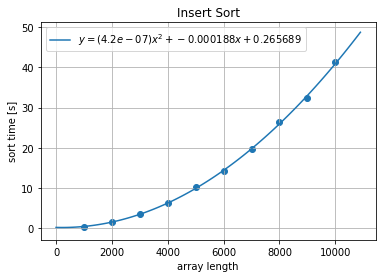

,a
0,4.248878e-07
1,-1.882797e-04
2,2.656895e-01


In [5]:
from scipy.optimize import curve_fit
def func_fit(x, a, b, c):
    return (a * x + b) * x + c

param, cov = curve_fit(func_fit, n_list, t_list)
x = np.array([i*100 for i in range(int(max(n_list)/100)+10)])
y = func_fit(x, param[0], param[1], param[2])

plt.title('Insert Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
plt.plot(x, y, label='$y = ({})x^2 + {}x + {}$'.format(round(param[0], 8), round(param[1], 6), round(param[2], 6)))
plt.scatter(n_list, t_list)
plt.grid()
plt.legend()
plt.show()

pd.DataFrame(data=param, columns=['a'])

In [6]:
# シェルソート
def shell_sort(array):
    N = len(array)
    gap = 1
    while 3*gap+1 < N:
        gap = 3 * gap + 1
    while gap > 0:
        for i in range(gap):
            for j in range(int((N-i)/gap)):
                for k in reversed(range(1, j+1)):
                    index = i + k*gap
                    if array[index-gap] > array[index]:
                        buff = array[index]
                        array[index] = array[index-gap]
                        array[index-gap] = buff
                    else:
                        break
        gap = int((gap - 1) / 3)

In [7]:
arr = np.array([random.randint(0, 100) for i in range(30)])
shell_sort(arr)
arr

array([ 2, 12, 14, 16, 18, 24, 36, 37, 38, 40, 44, 46, 49, 57, 58, 61, 61,
       61, 64, 67, 71, 72, 85, 88, 93, 95, 95, 97, 98, 99])

In [8]:
n_list = []
t_list = []
sorted_before = []
sorted_after = []
for n in [10000*i for i in range(1, 10+1)]:
    arr = np.array([random.random() for i in range(n)])
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_before.append(b)
    
    start = time.time()
    shell_sort(arr)
    end = time.time()
    n_list.append(n)
    t_list.append(round(end-start, 6))
    
    b = True
    for i in range(len(arr)-1):
        b = b and arr[i] < arr[i+1]
    sorted_after.append(b)

pd.DataFrame(data=np.array([n_list, t_list, sorted_before, sorted_after]).T, columns=['array length', 'sort time [s]', 'sorted (before)', 'sorted (after)'])

,array length,sort time [s],sorted (before),sorted (after)
0,10000.0,0.580643,0.0,1.0
1,20000.0,1.298350,0.0,1.0
2,30000.0,2.014133,0.0,1.0
3,40000.0,2.626495,0.0,1.0
4,50000.0,4.007731,0.0,1.0
5,60000.0,4.531848,0.0,1.0
6,70000.0,5.517010,0.0,1.0
7,80000.0,6.397215,0.0,1.0
8,90000.0,7.468249,0.0,1.0
9,100000.0,8.045152,0.0,1.0


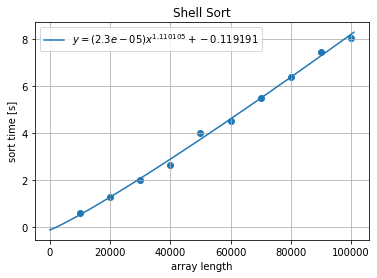

,a
0,0.000023
1,1.110105
2,-0.119191


In [18]:
from scipy.optimize import curve_fit
def func_fit(x, a, b, c):
    return a*np.power(x, b) + c

param, cov = curve_fit(func_fit, n_list, t_list)
x = np.array([i*100 for i in range(int(max(n_list)/100)+10)])
y = [func_fit(tmp, param[0], param[1], param[2]) for tmp in x]

plt.title('Shell Sort')
plt.xlabel('array length')
plt.ylabel('sort time [s]')
plt.plot(x, y, label='$y = ({})x^{{{}}} + {}$'.format(round(param[0], 6), round(param[1], 6), round(param[2], 6)))
plt.scatter(n_list, t_list)
plt.grid()
plt.legend()
plt.show()

pd.DataFrame(data=param, columns=['a'])
# かなり高速 & ほぼ1次関数くらいのオーダー